In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

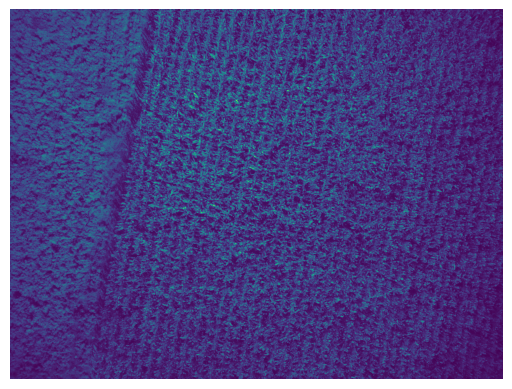

In [2]:
img = Image.open(r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005165509_0004_MS_G.TIF")
#img2=Image.open(r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005165509_0004_MS_G.TIF")
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
folder_path=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri"

In [4]:
counter=0

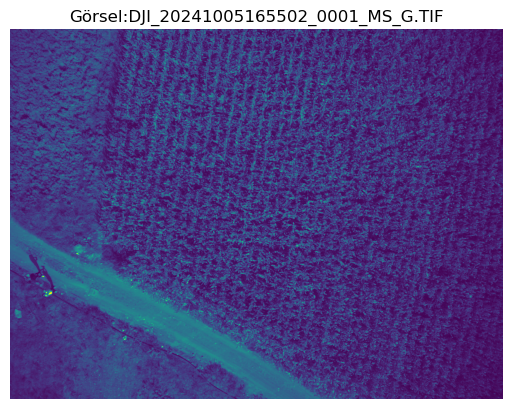

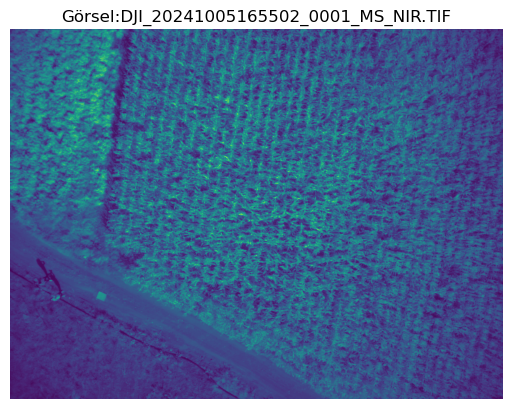

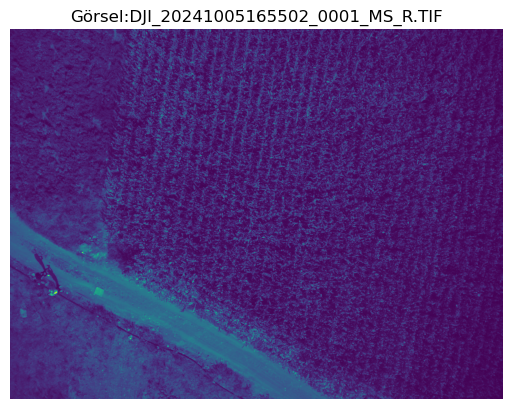

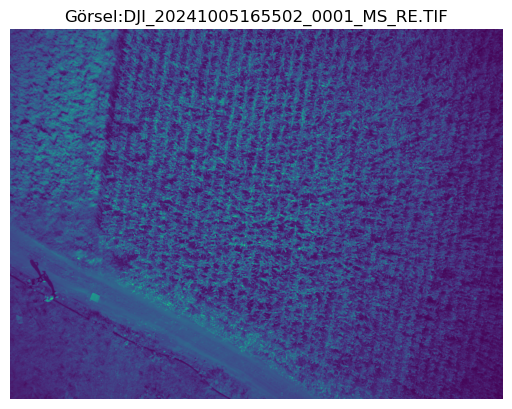

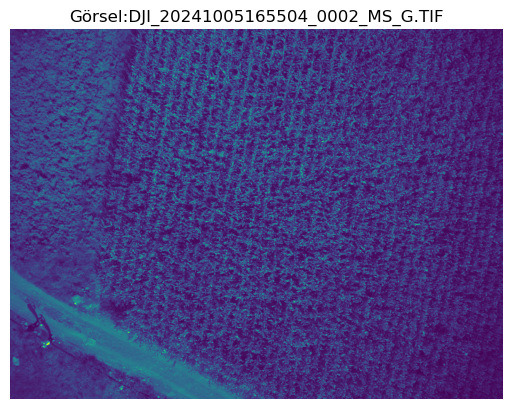

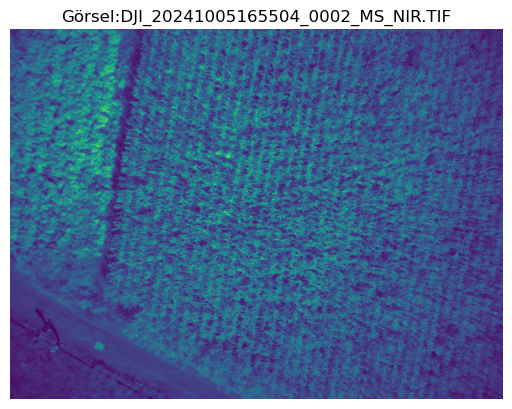

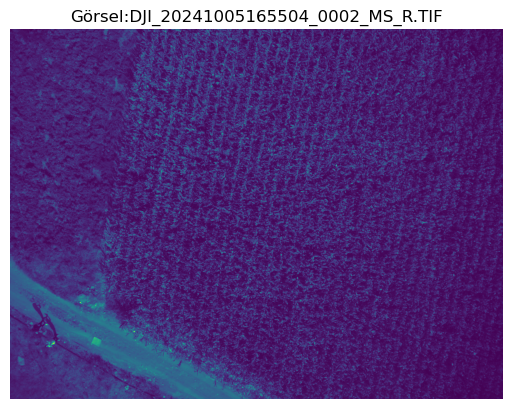

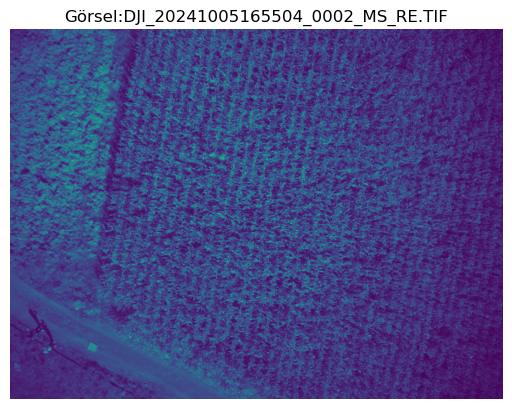

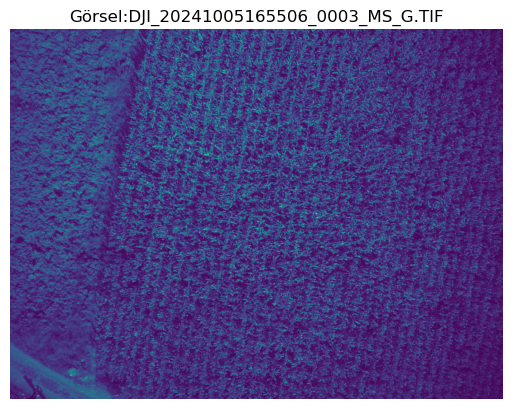

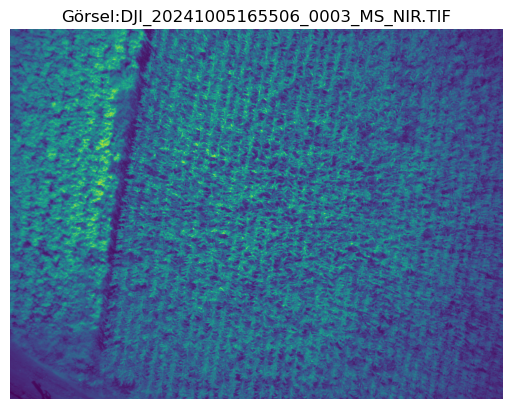

In [5]:
for filename in os.listdir(folder_path):
    if filename.endswith(".TIF"):
      file_path=os.path.join(folder_path,filename)
      img=Image.open(file_path)
      plt.imshow(img)
      plt.title(f'Görsel:{filename}')
      plt.axis('off')
      plt.show()
      counter += 1
      if counter == 10:
            break

In [6]:
import rasterio 

In [7]:
for filename in os.listdir(folder_path):
    if filename.endswith(".TIF"):
       file_path=os.path.join(folder_path,filename)
       with rasterio.open(file_path) as src:
           red_band=src.read(3)
           red_band=src.read(4)
           ndvi = (nir_band.astype(float) - red_band.astype(float)) / (nir_band + red_band)

           plt.imshow(ndvi,cmap='RdYlGn')
           plt.colorbar(label='NDVI')
           plt.title(f"NDVI Görüntüsü:{filename}")
           plt.axis('off')
           plt.show()
       counter += 1
       if counter == 10:
             break
      

C:\Users\ASUS\anaconda3\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


IndexError: band index 3 out of range (not in (1,))

In [8]:
file_path2=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005171236_0002_D.JPG"
with rasterio.open(file_path) as src:
    print(f"Bant sayısı:{src.count}")
    for i in range(1,src.count+1):
        band=src.read(i)
        print(f"Bant {i} boyutları:{band.shape}")

Bant sayısı:1
Bant 1 boyutları:(1944, 2592)


In [14]:
file_path3=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri"
def calculator_ndvi(nir_band,red_band):
    return (nir_band-red_band)/(nir_band+red_band)

#ilk 10 resimin NDVI hesaplama
for image_number in range(1,11):
    image_number_str=f"{image_number:04d}"

    ms_g_path=os.path.join(folder_path,f"DJI_20241005171234_{image_number_str}_MS_G.TIF")
    ms_nir_path=os.path.join(folder_path,f"DJI_20241005171234_{image_number_str}_MS_NIR.TIF")
    ms_r_path=os.path.join(folder_path,f"DJI_20241005171234_{image_number_str}_MS_R.TIF")
    ms_re_path=os.path.join(folder_path,f"DJI_20241005171234_{image_number_str}_MS_RE.TIF")
   # d_path=os.path.join(folder_path,f"DJI_20241005171234_{image_number_str}_D.JPG")
    
    with rasterio.open(ms_nir_path) as src:
        ms_nir_band=src.read(1).astype(float)
    with rasterio.open(ms_r_path) as src:
        ms_r_band=src.read(1).astype(float)

    #NDVI hesaplama
    ndvi=calculate_ndvi(ms_nir_band,ms_r_band)

    plt.figure(figsize=(8,6))
    plt.imshow(ndvi,cmap="RdYlGn")#renk haritası seçilmştir
    plt.colorbar() #renk skalasını göster
    plt.title(f"NDVI görüntüsü -{image_number_str}")
    plt.axis('off')
    plt.show()

RasterioIOError: C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\DJI_20241005171234_0001_MS_NIR.TIF: No such file or directory

In [15]:
ms_nir_path = r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005171234_0001_MS_NIR.TIF"

In [16]:
ms_nir_path

'C:\\\\Users\\\\ASUS\\\\Documents\\\\cornProject\\\\misirVerileri\\\\DJI_20241005171234_0001_MS_NIR.TIF'

In [28]:
# file_path3=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri"
# def calculator_ndvi(nir_band,red_band):
#     return (nir_band-red_band)/(nir_band+red_band)
# nir_band1=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005171234_0001_MS_NIR.TIF"
# red_band1=r"C:\\Users\\ASUS\\Documents\\cornProject\\misirVerileri\\DJI_20241005171234_0001_MS_R.TIF"

# nir_band1=np.array(nir_band1,dtype=float)
# red_band1=np.array(red_band1,dtype=float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14628\3049226931.py:15: RuntimeWarning: divide by zero encountered in divide
  return (nir_band - red_band) / (nir_band + red_band)


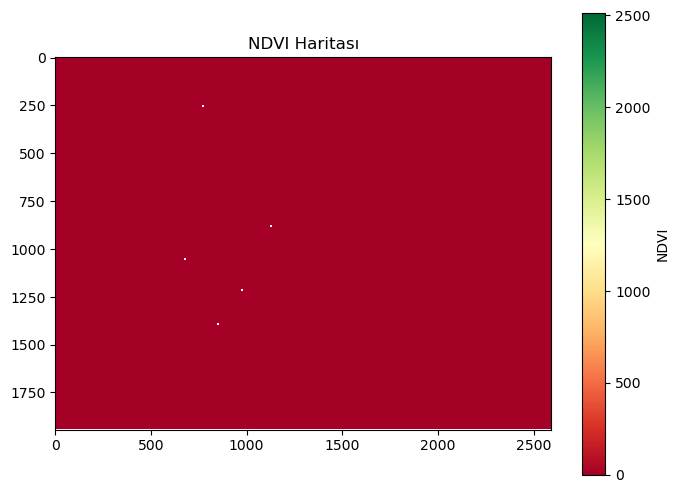

In [31]:
# Görsel dosyalarının yolları
nir_band1_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005165502_0001_MS_NIR.TIF"
red_band1_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005165502_0001_MS_R.TIF"

# Görselleri rasterio ile okuma
with rasterio.open(nir_band1_path) as nir_src:
    nir_band1 = nir_src.read(1)  # İlk bant verisi

with rasterio.open(red_band1_path) as red_src:
    red_band1 = red_src.read(1)  # İlk bant verisi

# NDVI hesaplama fonksiyonu
def calculate_ndvi(nir_band, red_band):
    # NDVI formülü: (NIR - Red) / (NIR + Red)
    return (nir_band - red_band) / (nir_band + red_band)

ndvi = calculate_ndvi(nir_band1, red_band1)

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title("NDVI Haritası")
plt.show()


In [32]:
nir_band1_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005165502_0001_MS_NIR.TIF"
print(os.path.exists(nir_band1_path))

True


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14628\3524598564.py:14: RuntimeWarning: divide by zero encountered in divide
  return (nir_band - red_band) / (nir_band + red_band)


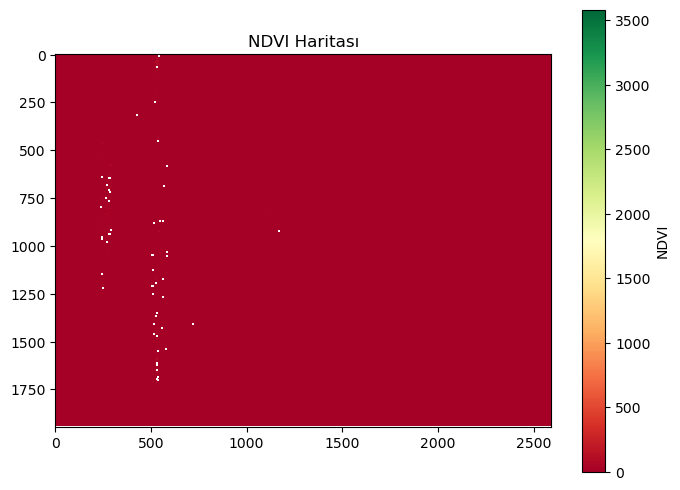

In [34]:
nir_band2_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005170503_0258_MS_NIR.TIF"
red_band2_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005170503_0258_MS_R.TIF"


with rasterio.open(nir_band2_path) as nir_src:
    nir_band1 = nir_src.read(1)  # İlk bant verisi

with rasterio.open(red_band2_path) as red_src:
    red_band1 = red_src.read(1)  # İlk bant verisi

# NDVI hesaplama fonksiyonu
def calculate_ndvi(nir_band, red_band):
    # NDVI formülü: (NIR - Red) / (NIR + Red)
    return (nir_band - red_band) / (nir_band + red_band)

ndvi = calculate_ndvi(nir_band1, red_band1)

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title("NDVI Haritası")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14628\1727591609.py:14: RuntimeWarning: divide by zero encountered in divide
  return (nir_band - red_band) / (nir_band + red_band)


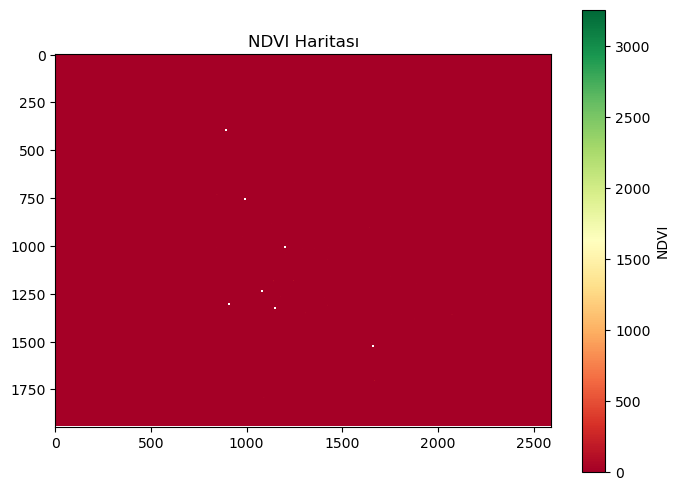

In [35]:
nir_band3_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005165937_0119_MS_NIR.TIF"
red_band3_path = r"C:\Users\ASUS\Documents\cornProject\misirVerileri\DJI_20241005165937_0119_MS_R.TIF"


with rasterio.open(nir_band3_path) as nir_src:
    nir_band1 = nir_src.read(1)  # İlk bant verisi

with rasterio.open(red_band3_path) as red_src:
    red_band1 = red_src.read(1)  # İlk bant verisi

# NDVI hesaplama fonksiyonu
def calculate_ndvi(nir_band, red_band):
    # NDVI formülü: (NIR - Red) / (NIR + Red)
    return (nir_band - red_band) / (nir_band + red_band)

ndvi = calculate_ndvi(nir_band1, red_band1)

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title("NDVI Haritası")
plt.show()